# BANK MARKETING
> Author : Clarissa Beatrice Kosasih

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data_train = pd.read_csv('Train.csv')
data_test = pd.read_csv('Test.csv')
data_train.head()

age          job  marital  education default  balance housing loan  \
0   40   management  married   tertiary      no      543     yes   no   
1   46  blue-collar  married    primary      no     1085     yes  yes   
2   37   technician  married  secondary      no      432     yes   no   
3   31   management   single   tertiary      no      358     yes   no   
4   27  blue-collar  married  secondary      no      821     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome    y  
0  cellular    2   feb       349         2    262       275    other   no  
1  cellular   15   may       523         2    353        58    other  yes  
2  cellular    6   jul       386         3    776        55  failure  yes  
3  cellular   30   jan        68         3    256        51  failure   no  
4   unknown   16   sep        23         1    778        41    other   no

## DATASET INTRO AND EXPLAINATION
1 - age (numeric)  
2 - job: type of job (categorical:
"admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur" "student",
"blue-collar" "self-employed", "retired" "technician" "services")  
3 - marital: marital status (categorical: "married" "divorced", "single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown", "secondary", "primary" "tertiary")  
5 - default: has credit in default? (binary: "yes", "no")  
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes", "no")  
8 - loan: has personal loan? (binary: "yes" "no")  
9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular")  
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
12 - duration: last contact duration, in seconds (numeric)  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown" "other" "failure" "success")  

*Output**  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
data_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# menggabungkan data test dan data train
data = pd.concat([data_train, data_test], sort = False)
data.head()

age          job  marital  education default  balance housing loan  \
0   40   management  married   tertiary      no      543     yes   no   
1   46  blue-collar  married    primary      no     1085     yes  yes   
2   37   technician  married  secondary      no      432     yes   no   
3   31   management   single   tertiary      no      358     yes   no   
4   27  blue-collar  married  secondary      no      821     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome    y  
0  cellular    2   feb       349         2    262       275    other   no  
1  cellular   15   may       523         2    353        58    other  yes  
2  cellular    6   jul       386         3    776        55  failure  yes  
3  cellular   30   jan        68         3    256        51  failure   no  
4   unknown   16   sep        23         1    778        41    other   no

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


jumlah data : 49732 rows dan 17 column

## DATA PREPROCESSING

### CHECK MISSING VALUES

In [8]:
# menampilkan semua NA
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

tidak ada missing values

## EDA

In [9]:
# describe kolom-kolom numerical
data.describe()

age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

function *describe()* digunakan untuk melihat informasi atau deskripsi di kolom-kolom numerical. Karena di data ini hanya ada 7 kolom, output code ini hanya memiliki 7 kolom  
- catatan : diperlukan scaling karena perbedaan yang cukup significant antara kolom balance dan duration dengan yang lain

### UNIVARIATE

In [ ]:
# numeric (dan check outlier) -> boxplot
# notes : plot interactive untuk menghindari label-label yang mengganggu

num_cols = data.select_dtypes(include=['number']).columns

for col in num_cols:
    fig = px.box(data, y=col, title=f'Boxplot of {col}',
                 labels={col: f'{col.capitalize()}'})
    fig.show()

- boxplot dapat digunakan untuk mengecek outlier, tapi outlier tidak akan ditangani untuk mempertahankan originalitas data  
- beberapa kolom seperti 'previous' dan 'pdays' dapat dikatakan tidak cocok untuk dibuat dalam boxplot karena value yang bernilai 0 dan -1 dan range nilai yang besar

In [11]:
data[['previous', 'pdays']].describe()

previous         pdays
count  49732.000000  49732.000000
mean       0.576892     40.158630
std        2.254838    100.127123
min        0.000000     -1.000000
25%        0.000000     -1.000000
50%        0.000000     -1.000000
75%        0.000000     -1.000000
max      275.000000    871.000000

- kolom 'previous' memiliki range value 0 sampai dengan 275
- kolom 'pdays' memiliki range value -1 sampai 871


In [12]:
# histogram untuk 'previous'
fig_prev = px.histogram(data, x='previous', nbins = 150, title='Histogram of previous',
                   labels={'previous': 'Previous'})
fig_prev.show()

# histogram untuk 'pdays'
fig_pdays = px.histogram(data, x='pdays', nbins = 150, title='Histogram of pdays',
                   labels={'pdays': 'Pdays'})
fig_pdays.show()

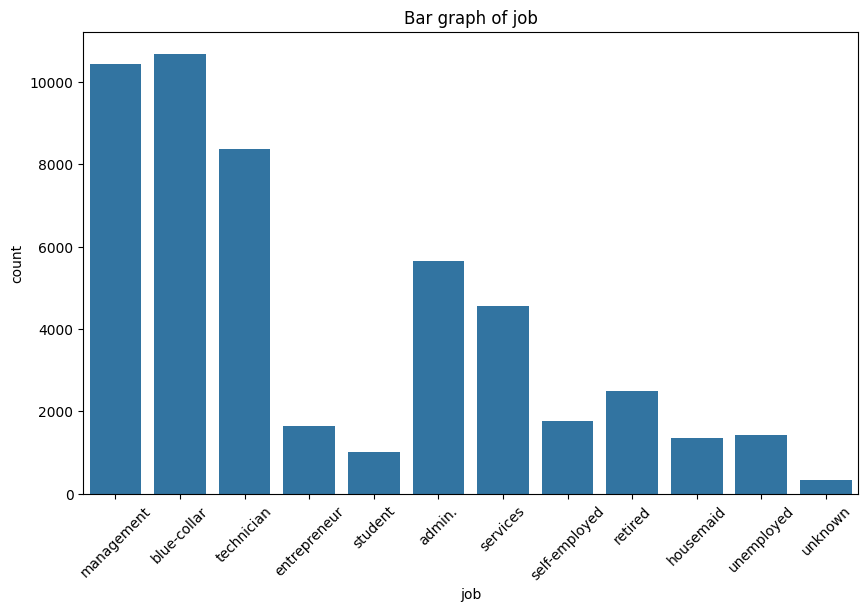

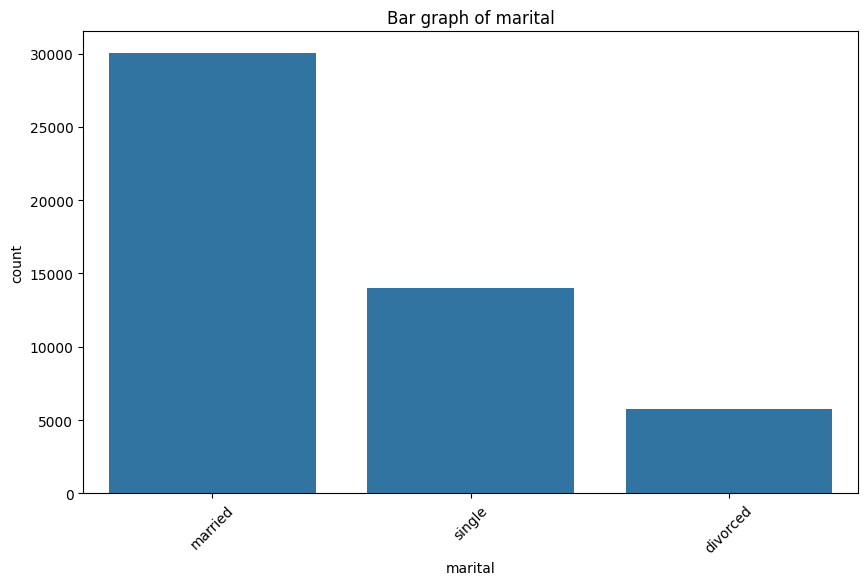

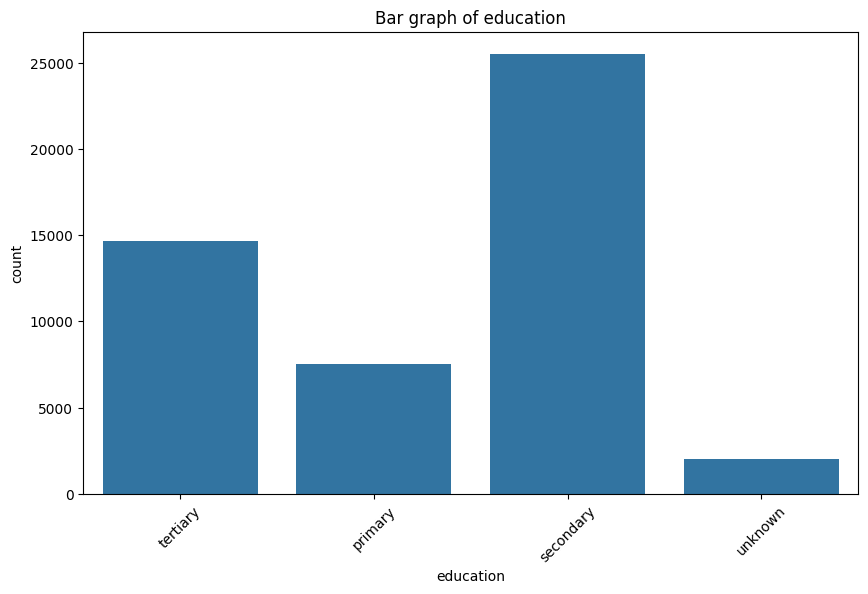

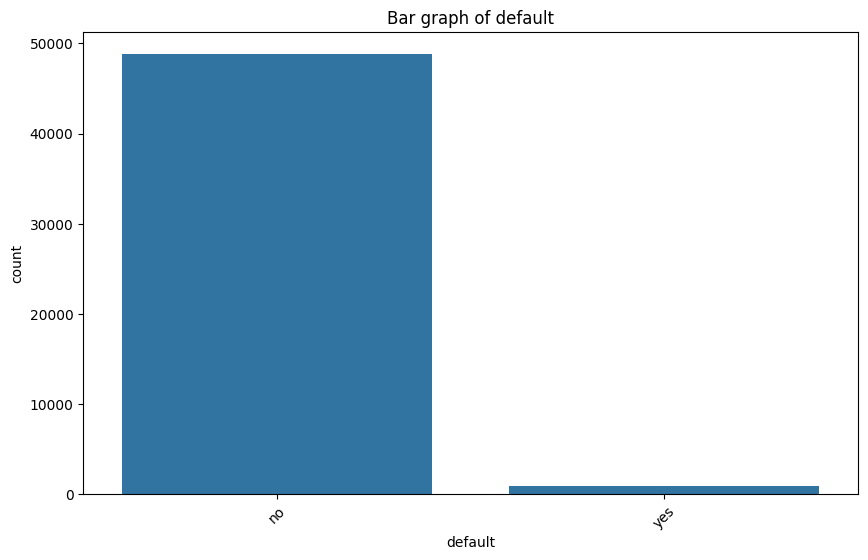

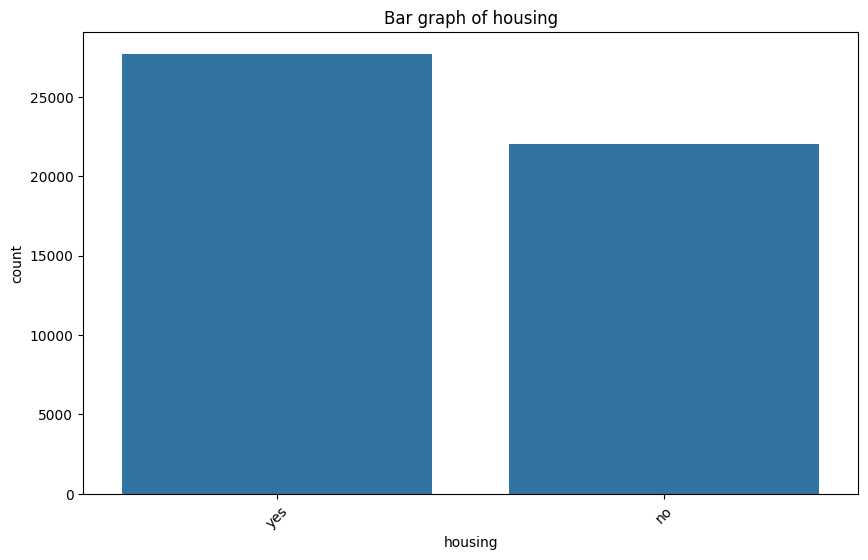

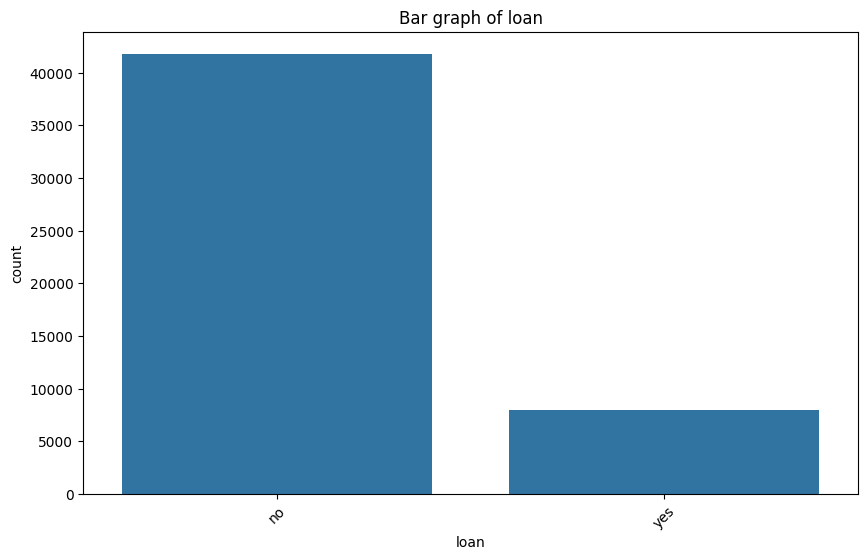

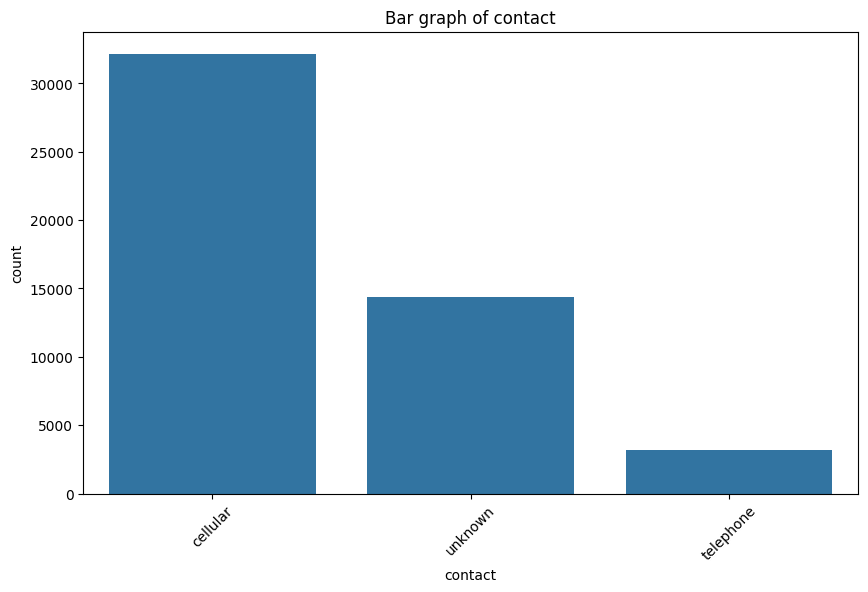

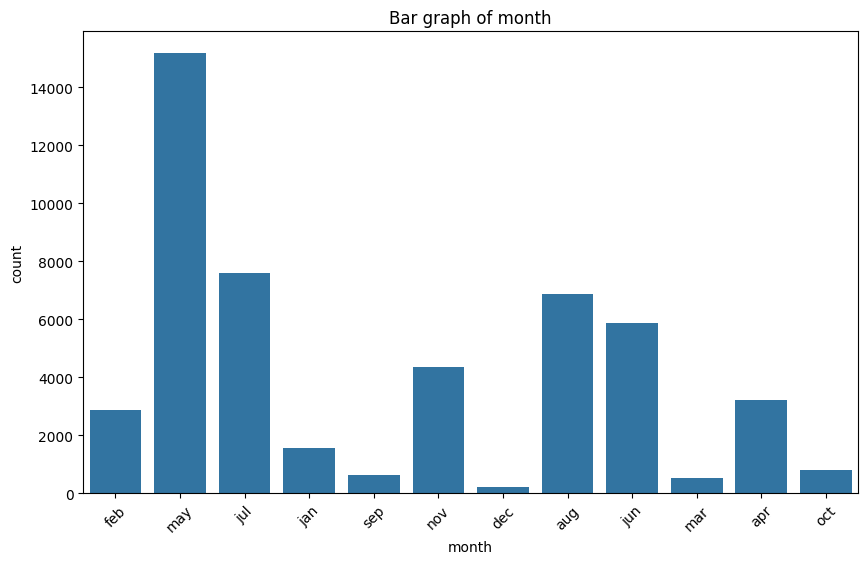

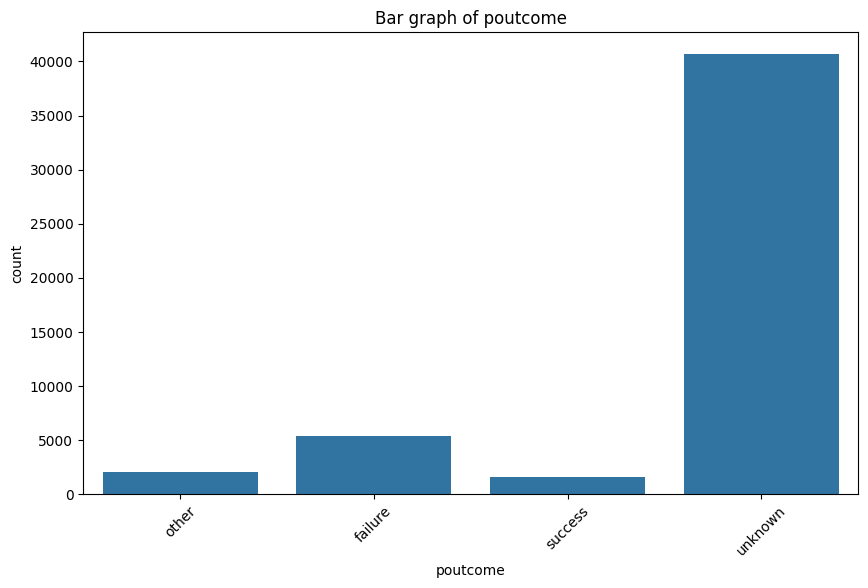

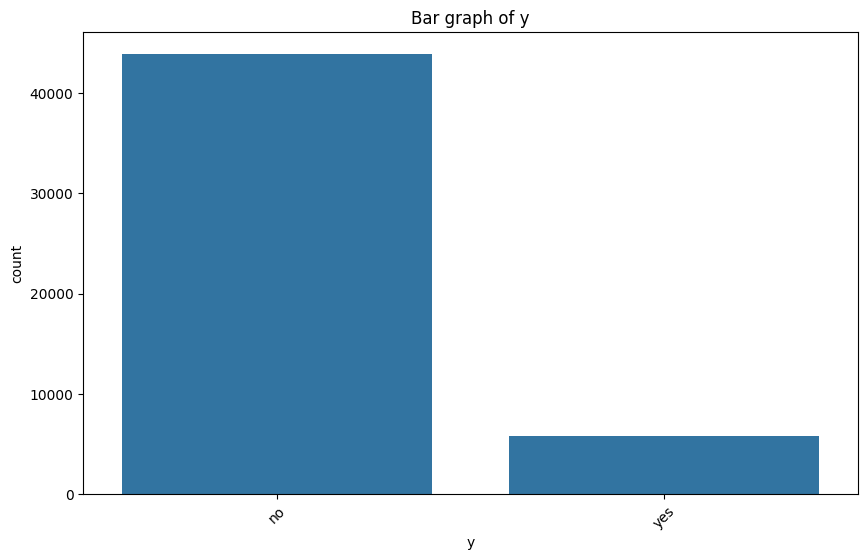

In [13]:
# categorical -> bar graph

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar graph of {col}')
    plt.xticks(rotation=45)
    plt.show()

# print(cat_cols)

- dari kolom 'y' dapat dilihat bahwa kebanyakan tidak subscribe term deposit (deposito berjangka)

### BIVARIATE

#### NUMERIC AND CATEGORICAL

In [14]:
# call duration dan y

fig = px.box(data, x='y', y='duration',
              title='Call Duration by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'duration': 'Call Duration (in seconds)'})

fig.show()

- semakin lama call duration, semakin tinggi peluang customer berlangganan deposito (semakin tinggi call duration, semakin tertarik customer)

In [15]:
# balance dan y

fig = px.box(data, x='y', y='balance',
              title='Balance by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'balance': 'Balance (in Euro)'})

fig.show()

- Q3, Q1, dan median customer yang berlangganan deposito lebih tinggi dibanding yang tidak

In [16]:
# age dan y

fig = px.box(data, x='y', y='age',
              title='Age by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'age': 'Age'})

fig.show()

- usia tidak terlalu mempengaruhi peluang langganan deposito (Q1, Q3, dan mediannya tidak berbeda jauh)

In [17]:
# day dan y

fig = px.box(data, x='y', y='day',
              title='Last Contact Day of the Month by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'day': 'Last Contact Day of the Month'})

fig.show()

- Hari terakhir contact tidak mempengaruhi langganan deposito

In [18]:
# campaign dan y

fig = px.box(data, x='y', y='campaign',
              title='Number of Campaign by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'campaign': 'Number of Campaign'})

fig.show()

- jumlah kontak yang dilakukan selama kampanye untuk klien tidak berpengaruh pada langganan deposito

In [19]:
# pdays dan y

fig = px.box(data, x='y', y='pdays',
              title='Number of Days that Passed After Last Campaign by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'pdays': 'Number of Days that Passed After Last Campaign'})

fig.show()

- Q1, Q3, dan median yang tidak berlangganan bernilai -1, artinya tidak client tidak di contact
- Sedangkan Q3 dari yang berlangganan deposito bernilai 98
- Dapat disimpulkan bahwa pdays (jumlah hari yang berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya) berpengaruh pada deposit subscription

In [20]:
# previous dan y

fig = px.box(data, x='y', y='previous',
              title='Number of Contact in Previous Campaign by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'previous': 'Number of Contact in Previous Campaign'})

fig.show()

ada 1 value yang besar sekali di claim 'No'. Sekilas boxplot terlihat sama

In [21]:
# delete outlier di previous yang bernilai 275
data = data[data['previous'] != 275]

# previous dan y (setelah outlier dihapus)
fig = px.box(data, x='y', y='previous',
              title='Number of Contact in Previous Campaign by Deposit Subscription',
              labels={'y': 'Deposit Subscription', 'previous': 'Number of Contact in Previous Campaign'})

fig.show()

- setelah outlier dihapus, terlihat bahwa boxplot mereka tidak mirip
- Q1, Q3, dan median di 'no' bernilai 0 karena tidak dikontak sehingga masuk akal jika tidak berlangganan deposito

#### CATEGORICAL AND CATEGORICAL

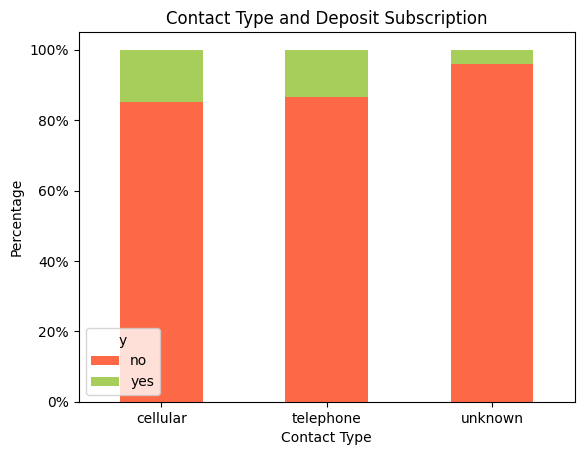

In [22]:
# contact type dan y -> stack bar dengan scala y 100%

# assign warna untuk setiap poutcome
colors = {'failure': 'red', 'other': 'orange', 'success': 'green', 'unknown': 'gray'}

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data dengan warna yg sudah di assign
(data.groupby('contact')['y'].value_counts(normalize=True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Contact Type and Deposit Subscription')
plt.xlabel('Contact Type')
plt.ylabel('Percentage')

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- 'cellular' menyumbang paling banyak persentase customer yang langganan deposito, diikuti dengan 'telephone' dan paling sedikit dari 'unknown'
- tipe contact 'unknown' adalah cara paling tidak efisien diantara ketiganya

Text(0, 0.5, 'Count')

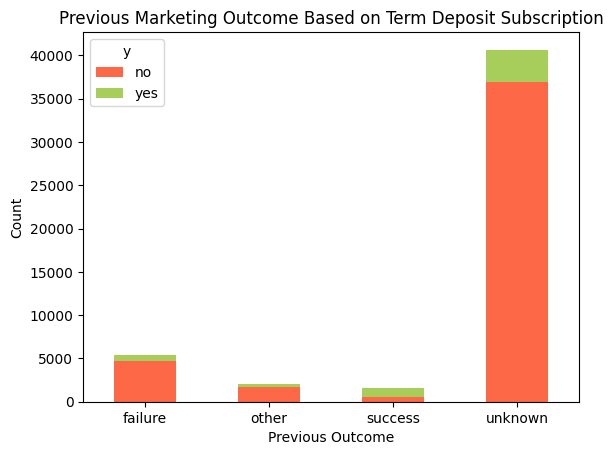

In [23]:
# poutcome dan y -> stack bar

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('poutcome')['y'].value_counts()
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Previous Marketing Outcome Based on Term Deposit Subscription')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')

Note : 'poutcome' adalah previous outcome marketing sedangkan 'y' adalah apakah customer sudah berlangganan deposito berjangka  

- sebagian besar jumlah customer disumbangkan oleh poutcome 'unknown' (baik yang memiliki dan yang belum memiliki deposito berjangka)
- akan tetapi, jika dihitung perbandingan antara yang sudah dan belum memiliki deposito berjangka, poutcome 'success' yang memiliki 'yes' rate lebih besar dibanding 'no' rate

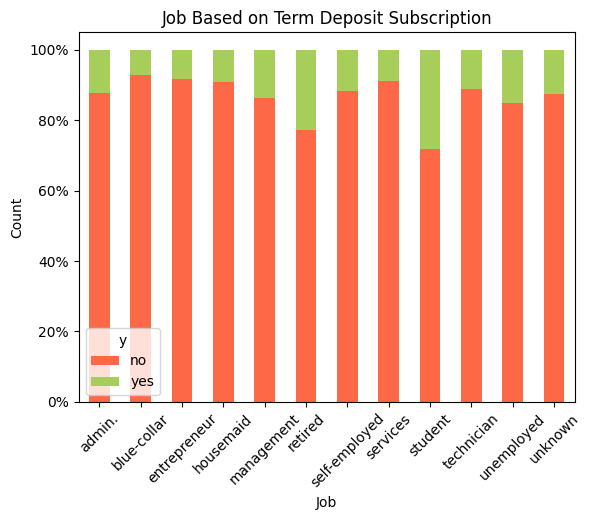

In [24]:
# y dan job -> stack bar

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('job')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=45) # supaya text di x axis tidak miring
plt.title('Job Based on Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
# plt.show()

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- paling banyak customer yang berlangganan deposito memiliki profesi sebagai murid dan pensiunan. Kemungkinan karena para customer tersebut tidak memiliki pekerjaan sehingga salah satu cara untuk "menggulung" uang mereka adalah lewat bunga deposito
- profesi blue collar memiliki persentase langganan deposito paling sedikit

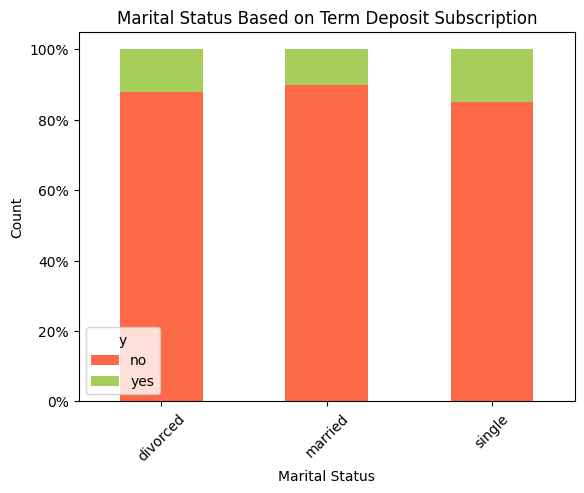

In [25]:
# marital dan y
# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('marital')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=45) # supaya text di x axis tidak miring
plt.title('Marital Status Based on Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')


# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- status 'single' memiliki persentase berlangganan deposito paling banyak, diikuti status 'divorce' dan terakhir 'married'
- akan tetapi persentase ketiganya tidak begitu jauh

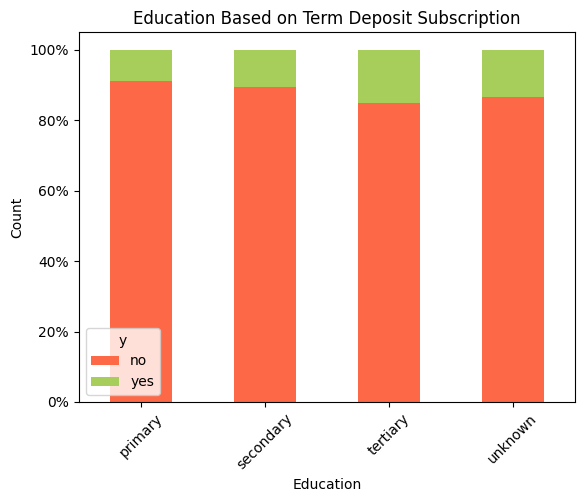

In [26]:
# education dan y
# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('education')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=45) # supaya text di x axis tidak miring
plt.title('Education Based on Term Deposit Subscription')
plt.xlabel('Education')
plt.ylabel('Count')


# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- customer dengan tingkat pendidikan tertiary (tingkat D3 ke atas) lebih banyak memiliki deposito. Hal ini dikarenakan pendapatan yang lebih tinggi karena level pendidikan dan kesadaran finansial yang lebih baik

<ipython-input-27-ada8ad00b5bd>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



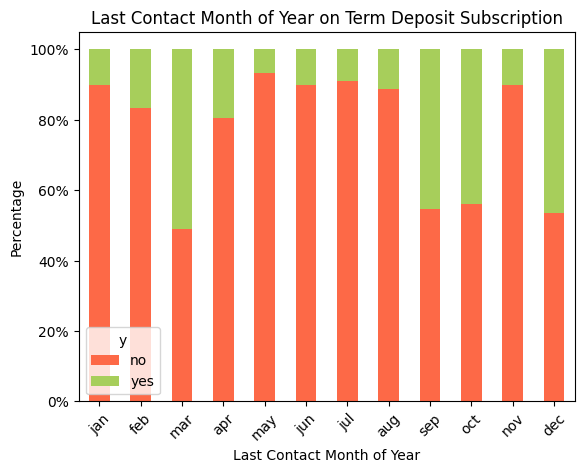

In [27]:
# month vs y

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('month')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=45) # supaya text di x axis tidak miring
plt.title('Last Contact Month of Year on Term Deposit Subscription')
plt.xlabel('Last Contact Month of Year')
plt.ylabel('Percentage')

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- Terdapat beberapa bulan yang menyumbang banyak persentase customer deposito baru. Kemungkinan terdapat event-event yang memicu banyaknya customer membuka deposito

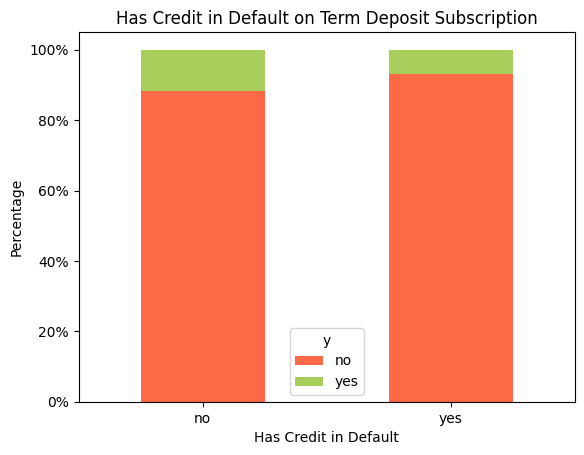

In [28]:
# default vs y

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('default')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Has Credit in Default on Term Deposit Subscription')
plt.xlabel('Has Credit in Default')
plt.ylabel('Percentage')

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- Persentase keduanya tidak memiliki banyak perbedaan jadi dapat dikatakan bahwa column 'default' tidak memiliki pengaruh besar terhadap langganan deposito

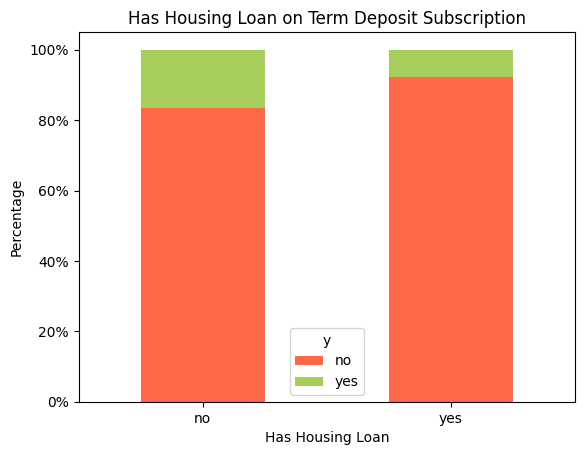

In [29]:
# housing vs y

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('housing')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Has Housing Loan on Term Deposit Subscription')
plt.xlabel('Has Housing Loan')
plt.ylabel('Percentage')

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- Orang-orang yang tidak memiliki housing loan lebih banyak langganan deposito   

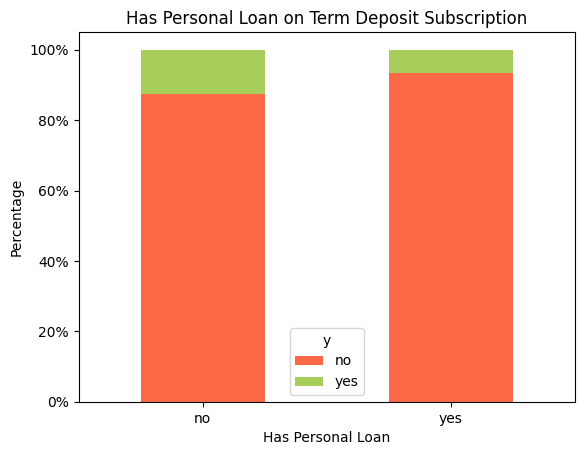

In [30]:
# loan vs y

# assign warna (hex code)
colors = {'yes': '#A7CE5B', 'no': '#FD6947'}

# group data
(data.groupby('loan')['y'].value_counts(normalize = True)
   .unstack('y')
   .plot.bar(stacked=True, color = colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Has Personal Loan on Term Deposit Subscription')
plt.xlabel('Has Personal Loan')
plt.ylabel('Percentage')

# skala y axis jadi 100%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

- sama seperti sebelumnya, orang-orang yang tidak memiliki personal loan (hutang) lebih banyak berlangganan deposito

## FEATURE ENGINEERING

In [31]:
# DROP COLUMN YANG TIDAK SIGNIFIKAN

data = data.drop(columns = ['age', 'previous', 'campaign', 'default', 'marital'])
data.head()

job  education  balance housing loan   contact  day month  \
1  blue-collar    primary     1085     yes  yes  cellular   15   may   
2   technician  secondary      432     yes   no  cellular    6   jul   
3   management   tertiary      358     yes   no  cellular   30   jan   
4  blue-collar  secondary      821     yes  yes   unknown   16   sep   
5   technician  secondary     4645     yes   no  cellular   11   jan   

   duration  pdays poutcome    y  
1       523    353    other  yes  
2       386    776  failure  yes  
3        68    256  failure   no  
4        23    778    other   no  
5       502    270    other   no

In [32]:
# ONE HOT ENCODING (job)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_job = encoder.fit_transform(data[['job']])
data = pd.concat([data, encoded_job.astype('int')],  axis = 1)
data = data.drop(columns = ['job'])

data.head()

education  balance housing loan   contact  day month  duration  pdays  \
1    primary     1085     yes  yes  cellular   15   may       523    353   
2  secondary      432     yes   no  cellular    6   jul       386    776   
3   tertiary      358     yes   no  cellular   30   jan        68    256   
4  secondary      821     yes  yes   unknown   16   sep        23    778   
5  secondary     4645     yes   no  cellular   11   jan       502    270   

  poutcome  ... job_entrepreneur  job_housemaid  job_management  job_retired  \
1    other  ...                0              0               0            0   
2  failure  ...                0              0               0            0   
3  failure  ...                0              0               1            0   
4    other  ...                0              0               0            0   
5    other  ...                0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
1                  0             0            0               0   
2                  0             0            0               1   
3                  0             0            0               0   
4                  0             0            0               0   
5                  0             0            0               1   

   job_unemployed  job_unknown  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
5               0            0  

[5 rows x 22 columns]

In [33]:
# BINARY ENCODING

data['housing'] = data['housing'].replace({'no' : 0, 'yes' : 1})
data['loan'] = data['loan'].replace({'no' : 0, 'yes' : 1})
data['y'] = data['y'].replace({'no' : 0, 'yes' : 1})
data.head()

<ipython-input-33-9e035782cf26>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-33-9e035782cf26>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-33-9e035782cf26>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



education  balance  housing  loan   contact  day month  duration  pdays  \
1    primary     1085        1     1  cellular   15   may       523    353   
2  secondary      432        1     0  cellular    6   jul       386    776   
3   tertiary      358        1     0  cellular   30   jan        68    256   
4  secondary      821        1     1   unknown   16   sep        23    778   
5  secondary     4645        1     0  cellular   11   jan       502    270   

  poutcome  ...  job_entrepreneur  job_housemaid  job_management  job_retired  \
1    other  ...                 0              0               0            0   
2  failure  ...                 0              0               0            0   
3  failure  ...                 0              0               1            0   
4    other  ...                 0              0               0            0   
5    other  ...                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
1                  0             0            0               0   
2                  0             0            0               1   
3                  0             0            0               0   
4                  0             0            0               0   
5                  0             0            0               1   

   job_unemployed  job_unknown  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
5               0            0  

[5 rows x 22 columns]

In [34]:
# LABEL ENCODING

data['education'] = data['education'].replace({'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3})
data['contact'] = data['contact'].replace({'unknown' : 0, 'cellular' : 1, 'telephone' : 2})
data['poutcome'] = data['poutcome'].replace({'failure' : 0, 'other' : 1, 'success' : 2, 'unknown' : 3})
data['month'] = data['month'].replace(
    {
        'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4,
        'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8,
        'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12
    }
).astype('int')
data.head()


<ipython-input-34-86d558c226c6>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-34-86d558c226c6>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-34-86d558c226c6>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-34-86d558c226c6>:6: FutureWarning:

Downcastin

education  balance  housing  loan  contact  day  month  duration  pdays  \
1          1     1085        1     1        1   15      5       523    353   
2          2      432        1     0        1    6      7       386    776   
3          3      358        1     0        1   30      1        68    256   
4          2      821        1     1        0   16      9        23    778   
5          2     4645        1     0        1   11      1       502    270   

   poutcome  ...  job_entrepreneur  job_housemaid  job_management  \
1         1  ...                 0              0               0   
2         0  ...                 0              0               0   
3         0  ...                 0              0               1   
4         1  ...                 0              0               0   
5         1  ...                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
1            0                  0             0            0               0   
2            0                  0             0            0               1   
3            0                  0             0            0               0   
4            0                  0             0            0               0   
5            0                  0             0            0               1   

   job_unemployed  job_unknown  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
5               0            0  

[5 rows x 22 columns]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49731 entries, 1 to 4520
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   education          49731 non-null  int64
 1   balance            49731 non-null  int64
 2   housing            49731 non-null  int64
 3   loan               49731 non-null  int64
 4   contact            49731 non-null  int64
 5   day                49731 non-null  int64
 6   month              49731 non-null  int64
 7   duration           49731 non-null  int64
 8   pdays              49731 non-null  int64
 9   poutcome           49731 non-null  int64
 10  y                  49731 non-null  int64
 11  job_blue-collar    49731 non-null  int64
 12  job_entrepreneur   49731 non-null  int64
 13  job_housemaid      49731 non-null  int64
 14  job_management     49731 non-null  int64
 15  job_retired        49731 non-null  int64
 16  job_self-employed  49731 non-null  int64
 17  job_services      

## DATA SPLITTING

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# X = data[data.columns.drop(['y'])]
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (39784, 21)
X_test : (9947, 21)
y_train : (39784,)
y_test : (9947,)


## SCALING

Karena dari hasil boxplot, column 'balance' dan 'duration' memiliki banyak outlier, scaling akan menggunakan Robust Scaling

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train['balance'] = scaler.fit_transform(X_train[['balance']])
X_test['balance'] = scaler.transform(X_test[['balance']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

In [39]:
X_train.head()

education   balance  housing  loan  contact  day  month  duration  \
30900          3 -0.292557        0     0        1   22      8  0.609302   
22665          2 -0.331614        0     0        1   14      7 -0.186047   
5758           2 -0.742815        1     1        1   21     11  1.632558   
41202          2  1.592483        1     0        1   13      5 -0.590698   
18651          0  0.639646        0     0        0   12      6 -0.567442   

       pdays  poutcome  ...  job_entrepreneur  job_housemaid  job_management  \
30900     -1         3  ...                 0              0               1   
22665     -1         3  ...                 0              0               0   
5758     184         0  ...                 0              0               1   
41202     -1         3  ...                 0              0               0   
18651     -1         3  ...                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
30900            0                  0             0            0   
22665            0                  0             0            0   
5758             0                  0             0            0   
41202            0                  0             0            0   
18651            0                  0             0            0   

       job_technician  job_unemployed  job_unknown  
30900               0               0            0  
22665               1               0            0  
5758                0               0            0  
41202               1               0            0  
18651               0               0            1  

[5 rows x 21 columns]

In [40]:
X_test.head()

education   balance  housing  loan  contact  day  month  duration  \
9190           2 -0.585114        1     0        0    7      5 -0.516279   
34697          2  1.018423        0     0        1   21     11  1.451163   
35950          2 -0.171702        1     1        1    2      2  0.158140   
5196           0 -0.003685        0     0        1    8      3 -0.190698   
4895           2 -0.142962        0     0        1   14      8  0.134884   

       pdays  poutcome  ...  job_entrepreneur  job_housemaid  job_management  \
9190      -1         3  ...                 0              0               0   
34697     -1         3  ...                 0              0               0   
35950     -1         3  ...                 0              0               0   
5196     279         0  ...                 0              0               0   
4895     106         2  ...                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
9190             0                  0             0            0   
34697            0                  0             0            0   
35950            0                  0             0            0   
5196             0                  0             0            0   
4895             0                  0             0            0   

       job_technician  job_unemployed  job_unknown  
9190                0               0            0  
34697               0               0            0  
35950               1               0            0  
5196                0               0            0  
4895                0               0            0  

[5 rows x 21 columns]

## MODELLING

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier()

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## EVALUATION

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9172614858751382

Confusion Matrix:
[[8555  219]
 [ 604  569]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8774
           1       0.72      0.49      0.58      1173

    accuracy                           0.92      9947
   macro avg       0.83      0.73      0.77      9947
weighted avg       0.91      0.92      0.91      9947



Accuracy : 92%  
Confusion Matrix :
- True Negative : yang diprediksi tidak langganan dan aslinya tidak berlangganan sebanyak 8528
- False Positive : yang diprediksi berlangganan padahal aslinya tidak berlangganan sebanyak 257
- False Negative : yang diprediksi tidak berlangganan padahal aslinya berlangganan sebanyak 577
- True Positive : yang diprediksi langganan dan aslinya benar berlangganan sebanyak 585

Precision :
- 93% dari prediksi kelas 0 (tidak langganan) benar
- 72% dari prediksi kelas 1 (berlangganan) benar

Recall :  
- 98% dari prediksi kelas 0 benar
- 49% dari prediksi kelas 1 benar

Macro AVG (precision dan recall):
- sudah cukup baik



# FINE TUNING

In [44]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 5.4 MB/s eta 0:00:00


In [45]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'RandomForestClassifier': RandomForestClassifier(random_state = 0),
    'KNeighborsClassifier': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(name)
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-------------------------")

RandomForestClassifier

Confusion Matrix:
[[8554  220]
 [ 603  570]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8774
           1       0.72      0.49      0.58      1173

    accuracy                           0.92      9947
   macro avg       0.83      0.73      0.77      9947
weighted avg       0.91      0.92      0.91      9947

-------------------------
KNeighborsClassifier

Confusion Matrix:
[[8460  314]
 [ 724  449]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8774
           1       0.59      0.38      0.46      1173

    accuracy                           0.90      9947
   macro avg       0.75      0.67      0.70      9947
weighted avg       0.88      0.90      0.89      9947

-------------------------


In [46]:
# GRID SEARCH RANDOM FOREST

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# parameter
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=0)

# grid search
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 3, scoring = 'precision', n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

# print parameter terbaik
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Precision:", grid_search_rf.best_score_)

# model terbaik
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluasi
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Precision: 0.7443523452322788
[[8689   85]
 [ 895  278]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8774
           1       0.77      0.24      0.36      1173

    accuracy                           0.90      9947
   macro avg       0.84      0.61      0.65      9947
weighted avg       0.89      0.90      0.88      9947



 scoring dari fine tuning model ini adalah 'precision' karena key point dari data ini adalah melihat apakah customer berlangganan deposito atau tidak (1 = langganan, 0 = tidak langganan)

Setelah Fine Tuning:
- False Negative meningkat, artinya banyak yang diprediksi tidak berlangganan padahal aslinya berlangganan. Namun, angka ini tidak menimbulkan kerugian untuk bank
- False Positive menurun drastis, artinya sedikit yang diprediksi berlangganan padahal aslinya tidak => angka ini lebih penting karena meminimalisir angka prediksi langganan deposito yg besar padahal aslinya sedikit yang berlangganan
- Macro AVG precision meningkat

Kesimpulan : model lebih presisi dalam memprediksi langganan atau tidaknya seseorang karena nilai FP menurun drastis

In [47]:
# GRID SEARCH KNN

# parameter
param_grid_knn = {
    'n_neighbors': [6, 8, 10, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

# grid search
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 3, scoring = 'precision', n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

# print parameter terbaik
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Precision:", grid_search_knn.best_score_)

# model terbaik
best_knn_model = grid_search_knn.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Evaluasi
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
Best Precision: 0.6892657533782085
[[8581  193]
 [ 704  469]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8774
           1       0.71      0.40      0.51      1173

    accuracy                           0.91      9947
   macro avg       0.82      0.69      0.73      9947
weighted avg       0.90      0.91      0.90      9947



Setelah Fine Tuning:
- Jumlah False Negative dan False Positive menurun
- Macro AVG precision dan recall meningkat

Kesimpulan: model lebih bagus menggunakan KNN dibanding Random Forest


# ROC CURVE

ROC Curve : Receiver Operating Characteristic Curve
- sebuah grafik yang dipakai untuk evaluasi model klasifikasi biner
- ROC Curve melihat hubungan antara True Positive Rate dan False Positive Rate untuk berbagai threshold
- threshold => batasan yang dipakai untuk mengklasifikasi sample itu kelas positif atau negatif
- plus point = untuk mengevaluasi model yang tidak seimbang (tidak bias ke kelas mayoritas)
- semakin ke kiri tas, semakin bagus ROC Curve


# ONE TABOO IN ML IS FITING SCALERS TO THE WHOLE DATASET

scaling seharusnya dilakukan setelah data splitting karena supaya menghindari "data leakage". Maksudnya adalah model dapat melihat data yang seharusnya tidak dapat diketahui selama training, kemudian merusak kemampuan model untuk memprediksi dan kemungkinan terjadi overfitting
